<a href="https://colab.research.google.com/github/opeyemiferanmi1/Employee-Attrition/blob/main/Employee_Attrition_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data = pd.ExcelFile('/content/drive/My Drive/data/Hash-Analytic-Python-Analytics-Problem-case-study-1.xlsx')

In [6]:
#Sheet1-Existing Employees
data1 = data.parse("Existing employees")
data1.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,status
0,2001,0.58,0.74,4,215,3,0,0,sales,low,Existing employees
1,2002,0.82,0.67,2,202,3,0,0,sales,low,Existing employees
2,2003,0.45,0.69,5,193,3,0,0,sales,low,Existing employees
3,2004,0.78,0.82,5,247,3,0,0,sales,low,Existing employees
4,2005,0.49,0.60,3,214,2,0,0,sales,low,Existing employees


In [7]:
#Sheet2-Employees who have left
data2 = data.parse("Employees who have left")
data2.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,status
0,1,0.38,0.53,2,157,3,0,0,sales,low,Employees who have left
1,2,0.80,0.86,5,262,6,0,0,sales,medium,Employees who have left
2,3,0.11,0.88,7,272,4,0,0,sales,medium,Employees who have left
3,4,0.72,0.87,5,223,5,0,0,sales,low,Employees who have left
4,5,0.37,0.52,2,159,3,0,0,sales,low,Employees who have left


## Explanatory Data Analysis

In [8]:
#Append the two sheets
new_data= data1.append(data2)

In [9]:
new_data.isnull().sum().any()

False

In [10]:
#Data consisting of both Existing and Employees who left
new_data.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,status
0,2001,0.58,0.74,4,215,3,0,0,sales,low,Existing employees
1,2002,0.82,0.67,2,202,3,0,0,sales,low,Existing employees
2,2003,0.45,0.69,5,193,3,0,0,sales,low,Existing employees
3,2004,0.78,0.82,5,247,3,0,0,sales,low,Existing employees
4,2005,0.49,0.60,3,214,2,0,0,sales,low,Existing employees


In [11]:
new_data['dept'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'RandD', 'marketing'], dtype=object)

In [12]:
from google.colab import files
new_data.to_csv("Input_data.csv", index = False)
#files.download("Input_data.csv")

## Data exploration and Visualization

In [13]:
V_data = new_data.copy()

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
new_data["status"]=le.fit_transform(new_data["status"])
new_data.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,status
0,2001,0.58,0.74,4,215,3,0,0,sales,low,1
1,2002,0.82,0.67,2,202,3,0,0,sales,low,1
2,2003,0.45,0.69,5,193,3,0,0,sales,low,1
3,2004,0.78,0.82,5,247,3,0,0,sales,low,1
4,2005,0.49,0.60,3,214,2,0,0,sales,low,1


In [14]:
sales_dept=new_data.loc[new_data.dept=='sales']['number_project']
rate_sales = sum(sales_dept)/len(sales_dept)

print("Rate of employees who have left:", rate_sales)

Rate of employees who have left: 3.776328502415459


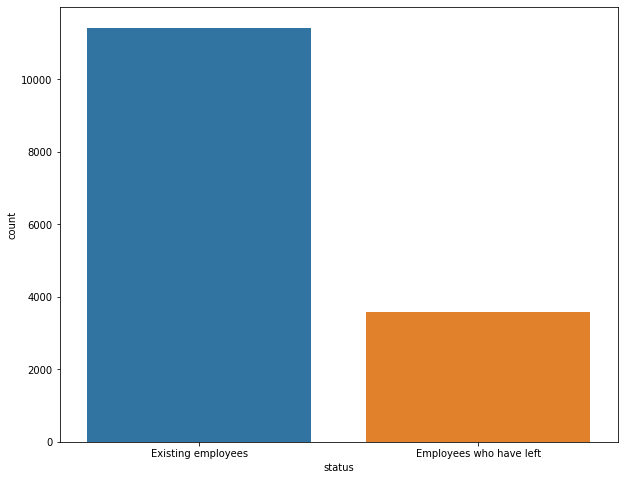

In [15]:
plt.figure(figsize=(10,8))
sns.countplot(x ='status',data = V_data)
plt.show()

In [17]:
new_data['salary'] = new_data['salary'].map({'high':2,'medium':1,'low':0})
new_data.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,status
0,2001,0.58,0.74,4,215,3,0,0,sales,0,1
1,2002,0.82,0.67,2,202,3,0,0,sales,0,1
2,2003,0.45,0.69,5,193,3,0,0,sales,0,1
3,2004,0.78,0.82,5,247,3,0,0,sales,0,1
4,2005,0.49,0.60,3,214,2,0,0,sales,0,1


In [18]:
D_data = pd.get_dummies(new_data)
D_data.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,status,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
0,2001,0.58,0.74,4,215,3,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1,2002,0.82,0.67,2,202,3,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,2003,0.45,0.69,5,193,3,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,2004,0.78,0.82,5,247,3,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,2005,0.49,0.60,3,214,2,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [19]:
cols_2_join = ['Emp ID']
R_data=D_data.drop(cols_2_join, axis=1)

In [20]:
A=R_data.drop(['status'],axis =1 )
A.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
0,0.58,0.74,4,215,3,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.82,0.67,2,202,3,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.45,0.69,5,193,3,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0.78,0.82,5,247,3,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.49,0.60,3,214,2,0,0,0,0,0,0,0,0,0,0,1,0,0


In [21]:
B =pd.DataFrame(R_data['status'])
B.head()

,status
0,1
1,1
2,1
3,1
4,1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


[0.24695623 0.13105251 0.23596512 0.1370745  0.17546402 0.01778171
 0.00297406 0.02107348 0.00293979 0.00291073 0.00275537 0.0026869
 0.0024508  0.00213464 0.00222328 0.0045849  0.00414784 0.00482411]


Text(0.5, 0, 'Importance')

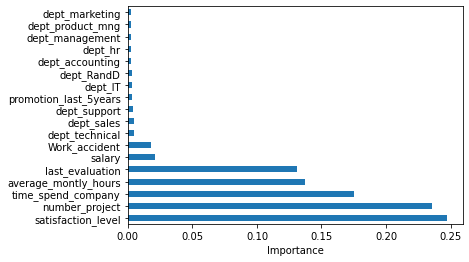

In [22]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(A,B)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=A.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.xlabel("Importance")

In [23]:
y =pd.DataFrame(D_data['status'])
y.head()

,status
0,1
1,1
2,1
3,1
4,1


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


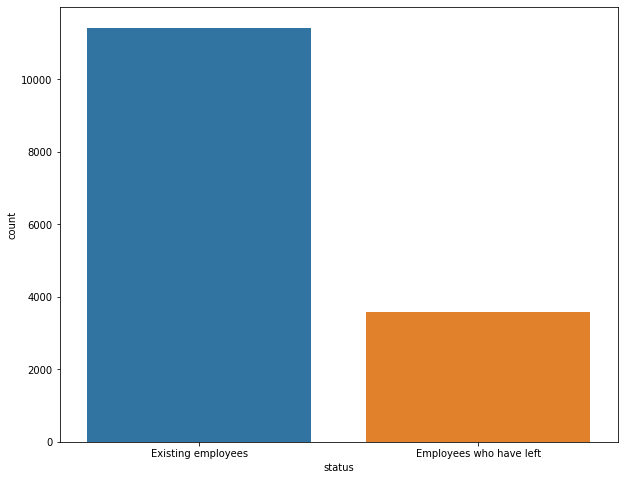

In [24]:
plt.figure(figsize=[10,8])
sns.countplot(V_data['status'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


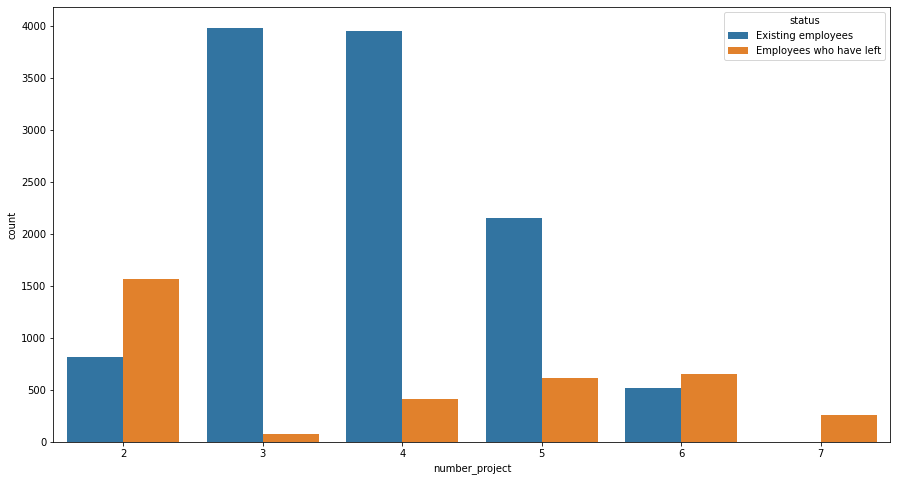

In [25]:
plt.figure(figsize=[15,8])
sns.countplot(V_data['number_project'],hue = V_data['status'])

More employees with few number of projects tends to leave due to the fact that they feel idle.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


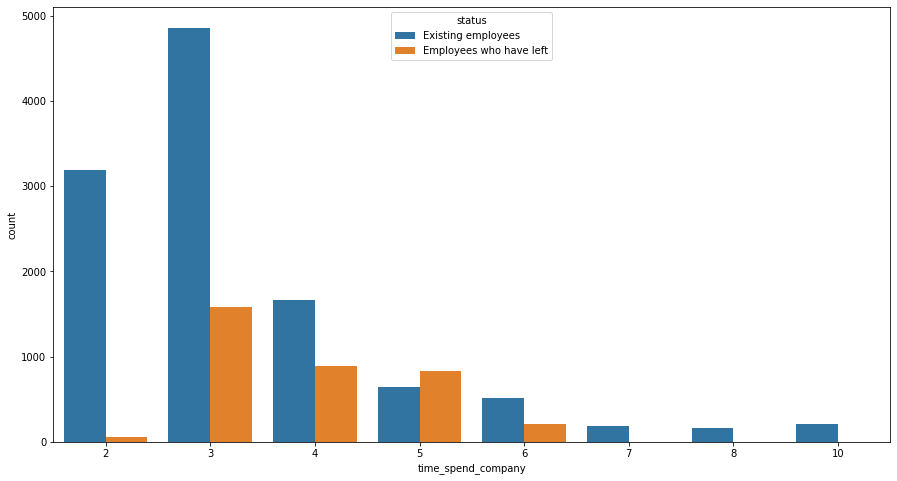

In [26]:
plt.figure(figsize=[15,8])
sns.countplot(V_data['time_spend_company'],hue = V_data['status'])

Existing employees is 1, Therefore we see that employees who spend less time at work tends to stay. 
We also have that most employees that left do not stay too long at work due to the fact that they feel idle

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


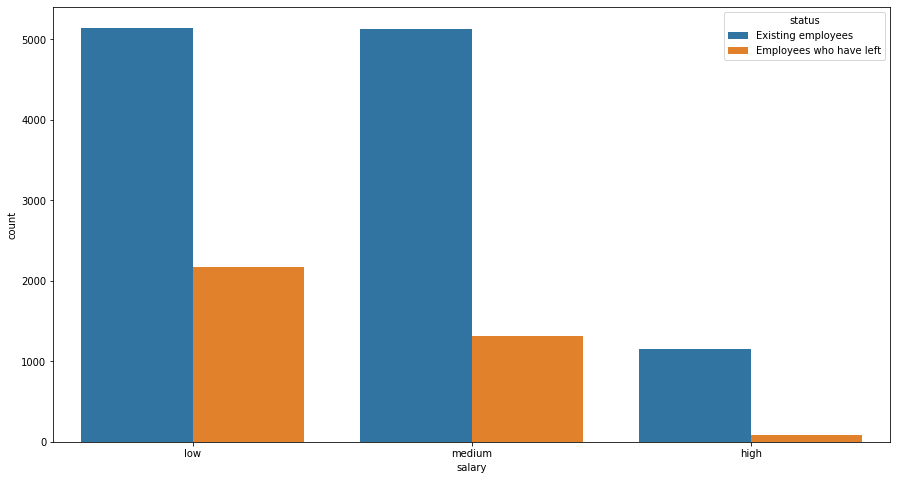

In [27]:
plt.figure(figsize=[15,8])
sns.countplot(V_data['salary'],hue = V_data['status'])

This shows that a low salary is not the only reason why employees leave,since even a high number of employees with low salary still stay, there fore, it is proper to use a correlation map to visualize the statistics


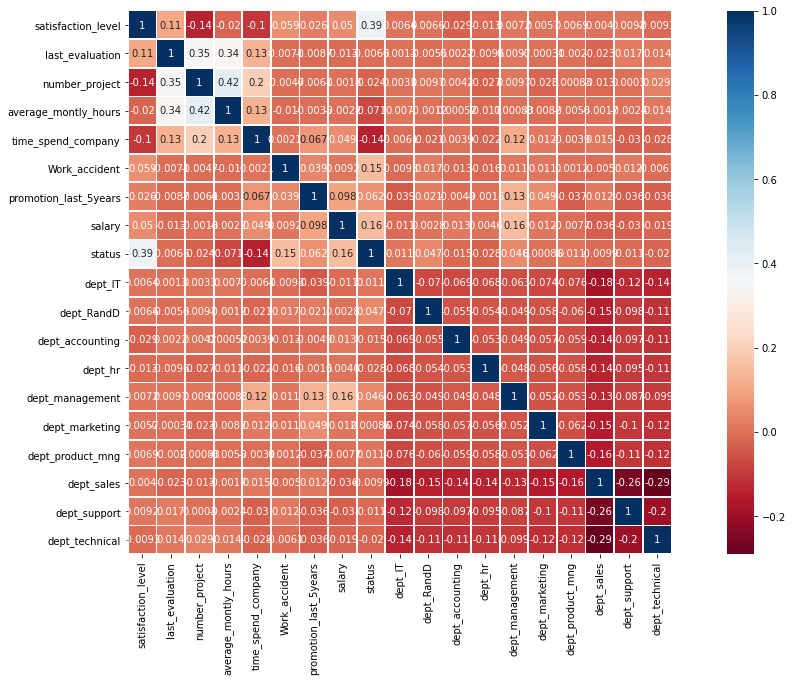

In [28]:
corrmat=R_data.corr()
f,ax=plt.subplots(figsize=(20,10))
sns.heatmap(corrmat,square=True, annot=True, linewidth=0.8,cmap='RdBu');

The attrition correlates weakly with satisfaction level, number of projects, time spend company, average monthly hours and last evaluation as shown below.


However our target attribute ”Status” showed a good correlation with the employee satisfaction level. 



/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


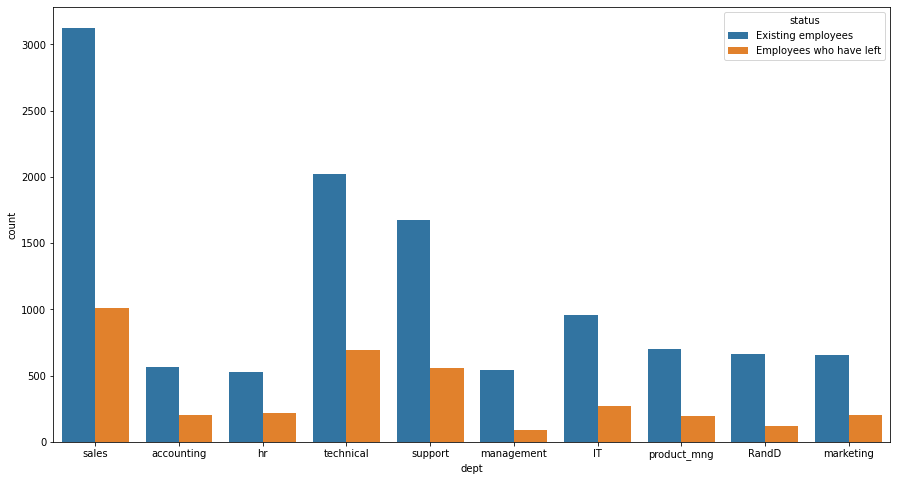

In [29]:
plt.figure(figsize=[15,8])
sns.countplot(V_data['dept'],hue = V_data['status'])

Shows there are more employees that left in the Sales department

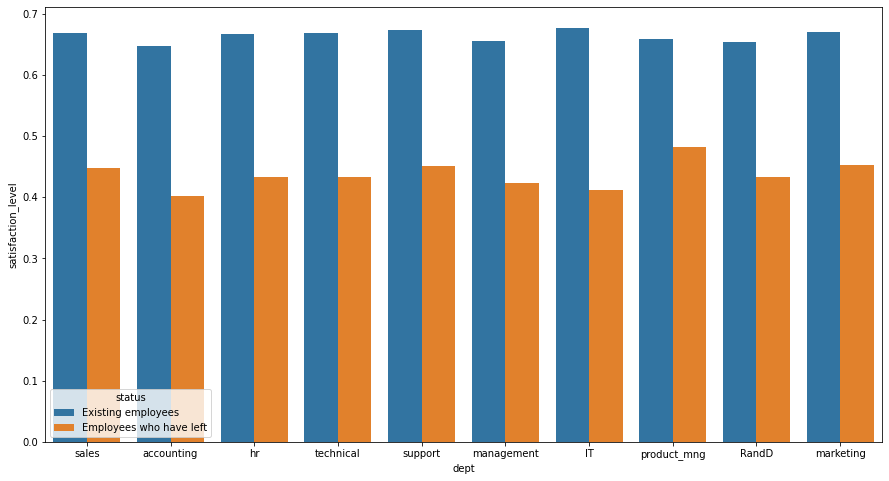

In [30]:
plt.figure(figsize=[15,8])
#sns.barplot(new_data[],)
sns.barplot(x = 'dept', y = 'satisfaction_level', hue = 'status', data = V_data, ci = False)

In [48]:
#plt.figure(figsize=(17,8))
#sns.countplot(V_data['satisfaction_level'],hue = V_data['status'])

In [32]:
V_data['satisfaction_level'].unique()

array([0.58, 0.82, 0.45, 0.78, 0.49, 0.36, 0.54, 0.99, 0.5 , 0.74, 0.56,
       0.34, 0.48, 0.73, 0.59, 0.81, 0.9 , 0.41, 0.89, 0.79, 0.98, 0.75,
       1.  , 0.24, 0.84, 0.92, 0.61, 0.85, 0.67, 0.76, 0.19, 0.51, 0.52,
       0.71, 0.33, 0.87, 0.68, 0.7 , 0.63, 0.72, 0.77, 0.86, 0.15, 0.93,
       0.62, 0.53, 0.97, 0.39, 0.69, 0.25, 0.12, 0.57, 0.6 , 0.2 , 0.94,
       0.17, 0.35, 0.42, 0.64, 0.91, 0.88, 0.96, 0.27, 0.65, 0.8 , 0.38,
       0.26, 0.55, 0.46, 0.13, 0.21, 0.22, 0.83, 0.18, 0.14, 0.16, 0.43,
       0.28, 0.95, 0.47, 0.32, 0.29, 0.4 , 0.66, 0.3 , 0.37, 0.44, 0.31,
       0.23, 0.11, 0.1 , 0.09])

In [33]:
bins = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
labels = ['0.1-0.19','0.2-0.29','0.3-0.39','0.4-0.49','0.5-0.59','0.6-0.69','0.7-0.79','0.8-0.89','0.9-1']
V_data['satisfaction_level_range']=pd.cut(V_data['satisfaction_level'],bins =bins, labels = labels)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


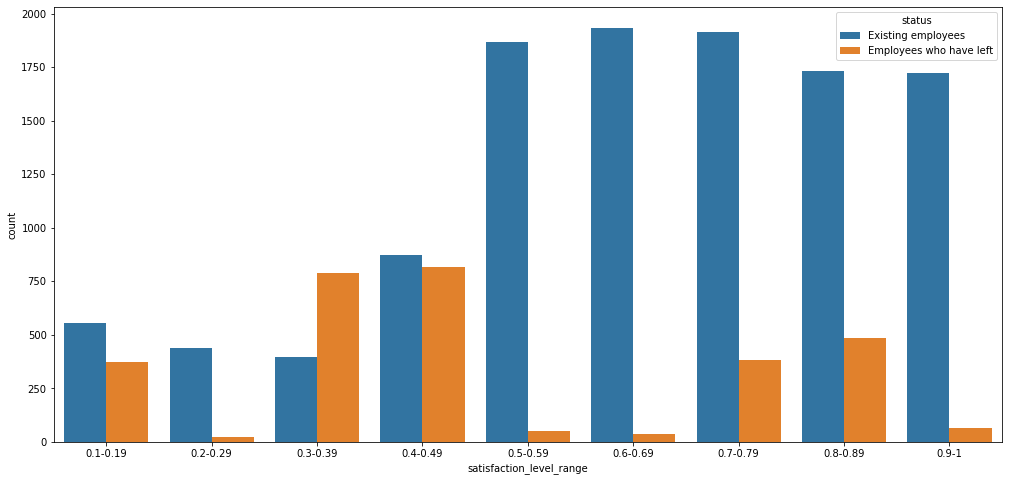

In [34]:
plt.figure(figsize=(17,8))
sns.countplot(V_data['satisfaction_level_range'],hue = V_data['status'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


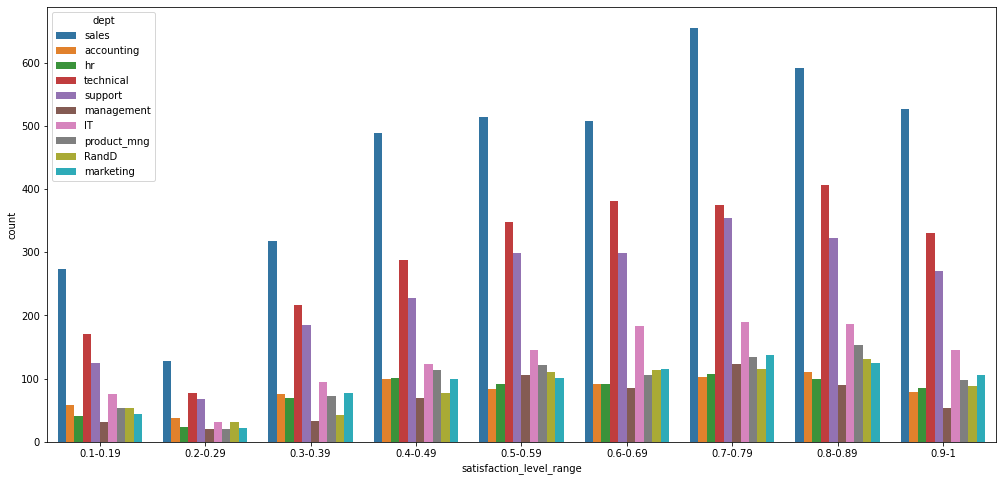

In [35]:
plt.figure(figsize=(17,8))
sns.countplot(V_data['satisfaction_level_range'],hue = V_data['dept'])

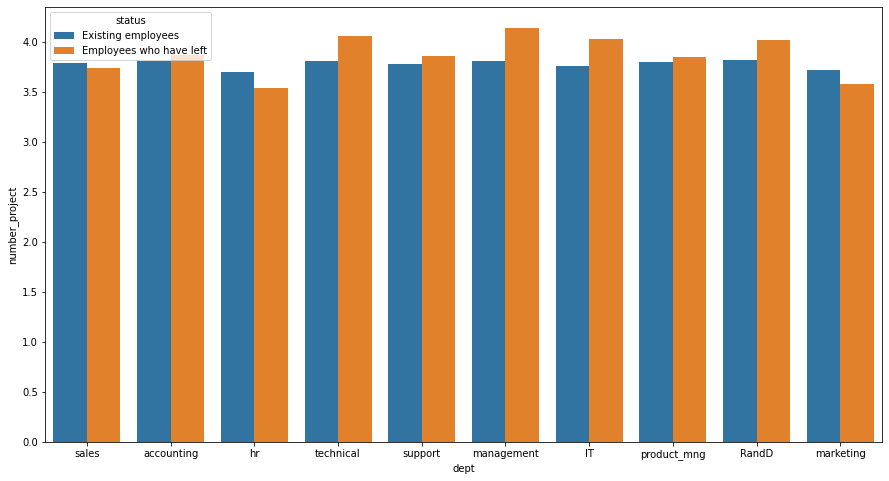

In [36]:
plt.figure(figsize=[15,8])
sns.barplot(x = 'dept', y = 'number_project', hue = 'status', data = V_data,ci = False)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


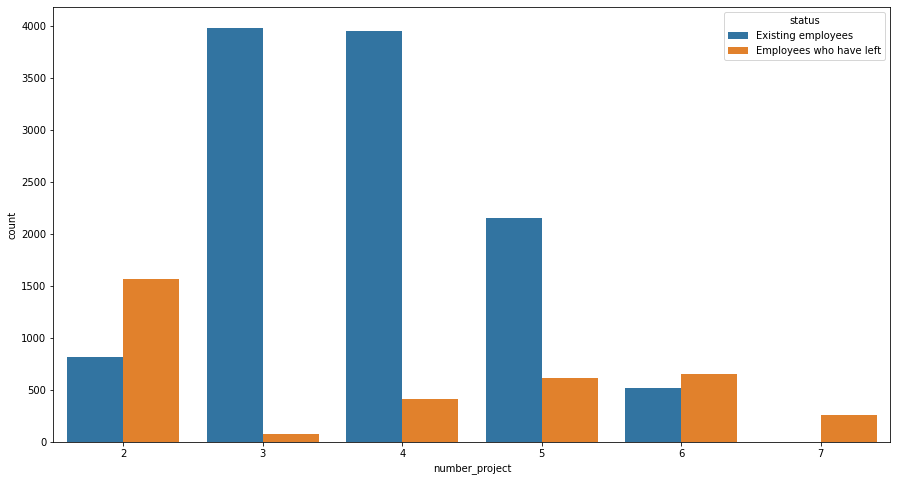

In [37]:
plt.figure(figsize=[15,8])
sns.countplot(V_data['number_project'],hue = V_data['status'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


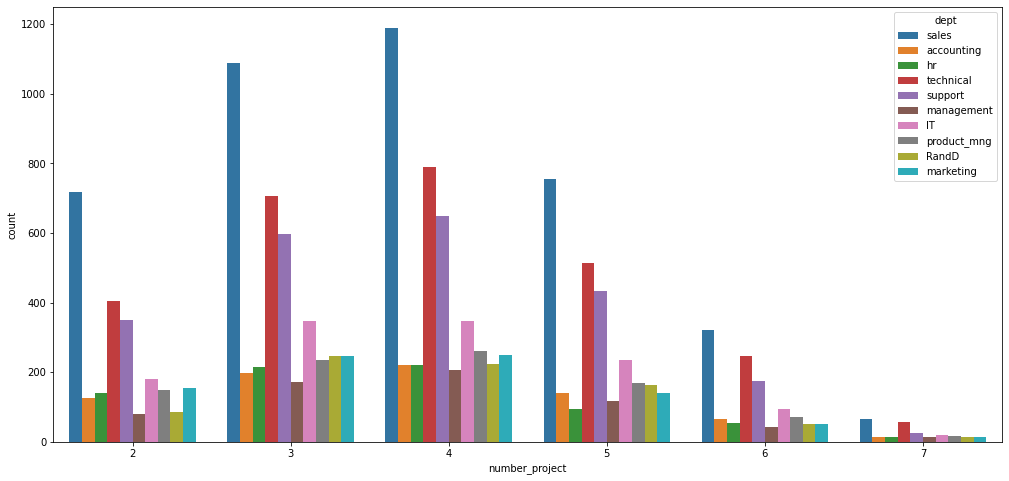

In [38]:
plt.figure(figsize=(17,8))
sns.countplot(V_data['number_project'],hue = V_data['dept'])

In [39]:
V_data['last_evaluation'].unique()

array([0.74, 0.67, 0.69, 0.82, 0.6 , 0.95, 0.37, 0.91, 0.75, 0.64, 0.58,
       0.39, 0.94, 0.62, 0.87, 0.57, 0.66, 0.84, 0.92, 0.97, 0.7 , 0.41,
       0.43, 0.86, 0.93, 0.98, 0.77, 0.59, 0.56, 0.79, 0.53, 0.8 , 0.88,
       0.65, 0.5 , 0.85, 0.55, 0.54, 0.68, 0.61, 0.52, 0.78, 0.99, 0.81,
       0.83, 0.47, 0.45, 0.51, 0.44, 0.9 , 1.  , 0.73, 0.76, 0.96, 0.72,
       0.89, 0.48, 0.63, 0.46, 0.71, 0.49, 0.36, 0.38, 0.4 , 0.42])

In [40]:
bins = [0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
labels = ['0.3-0.39','0.4-0.49','0.5-0.59','0.6-0.69','0.7-0.79','0.8-0.89','0.9-1']
V_data['last_evaluation_score']=pd.cut(V_data['last_evaluation'],bins =bins, labels = labels)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


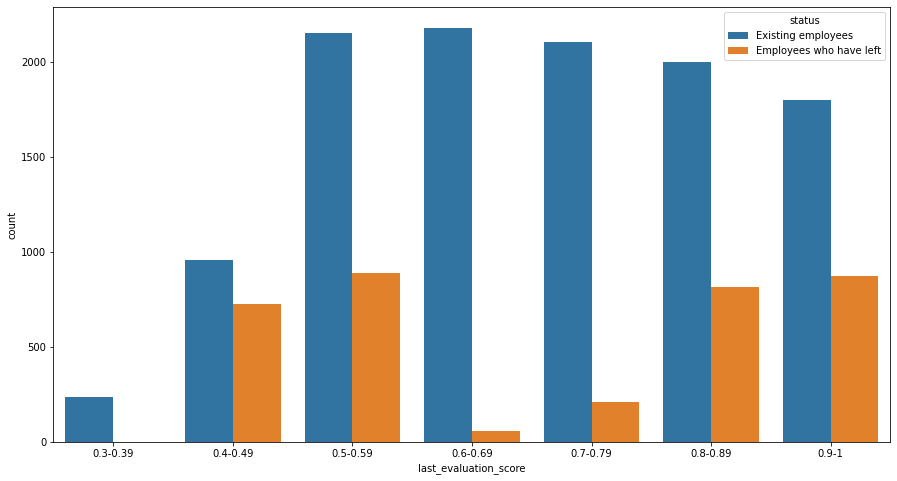

In [41]:
plt.figure(figsize=[15,8])
sns.countplot(V_data['last_evaluation_score'],hue = V_data['status'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


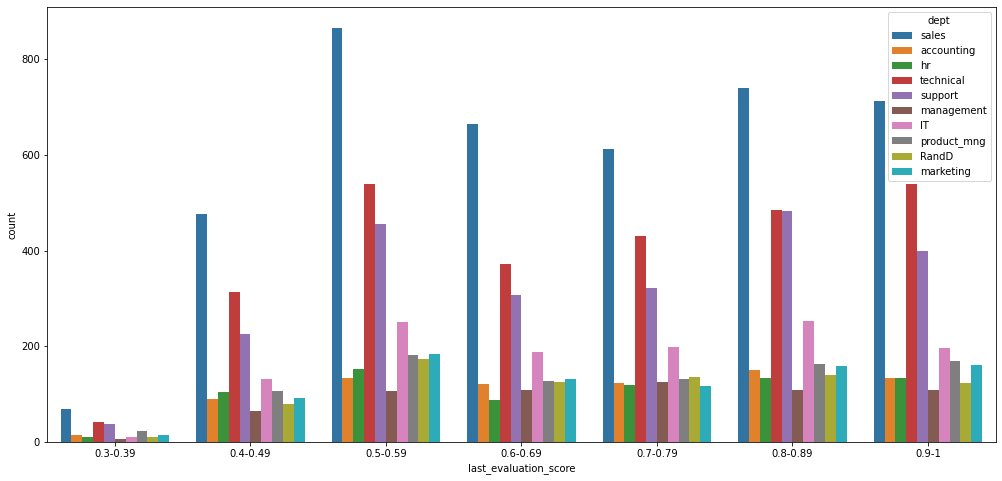

In [42]:
plt.figure(figsize=(17,8))
sns.countplot(V_data['last_evaluation_score'],hue = V_data['dept'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


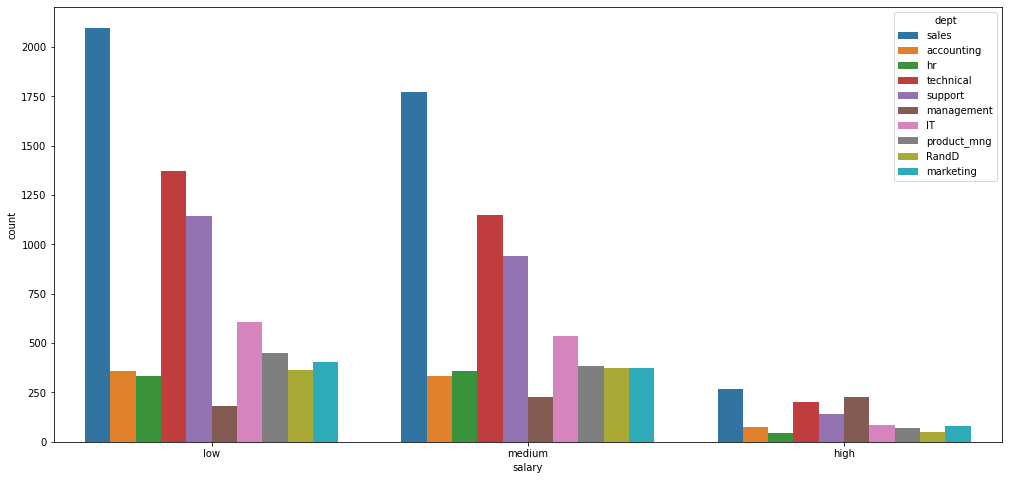

In [43]:
plt.figure(figsize=(17,8))
sns.countplot(V_data['salary'],hue = V_data['dept'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


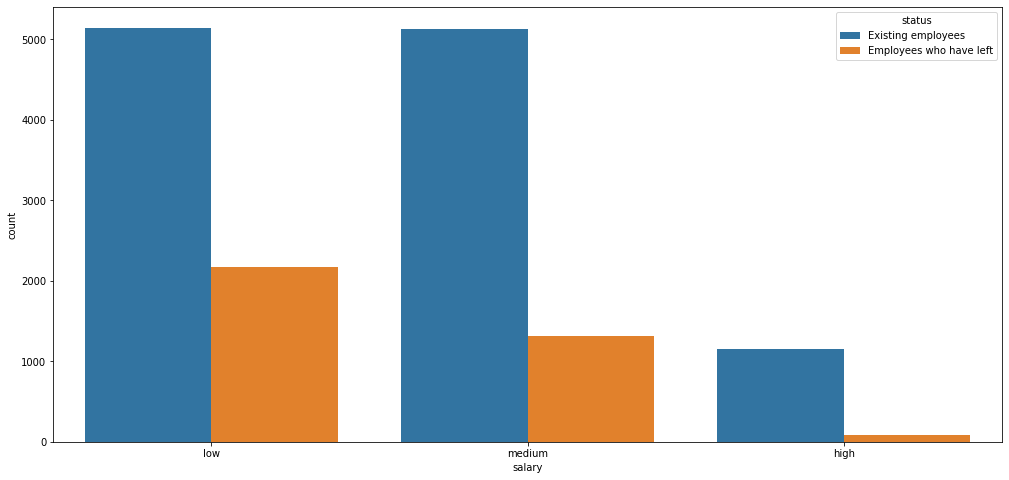

In [44]:
plt.figure(figsize=(17,8))
sns.countplot(V_data['salary'],hue = V_data['status'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


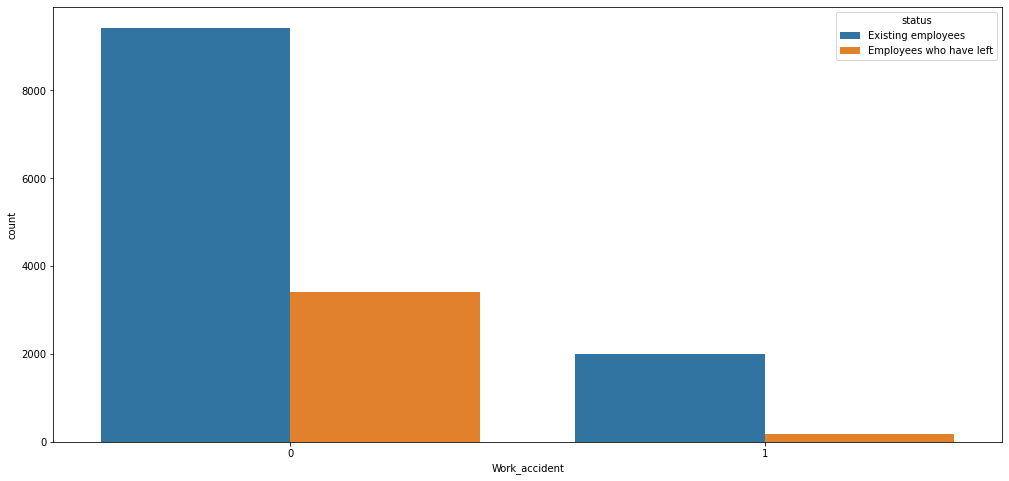

In [45]:
plt.figure(figsize=(17,8))
sns.countplot(V_data['Work_accident'],hue = V_data['status'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


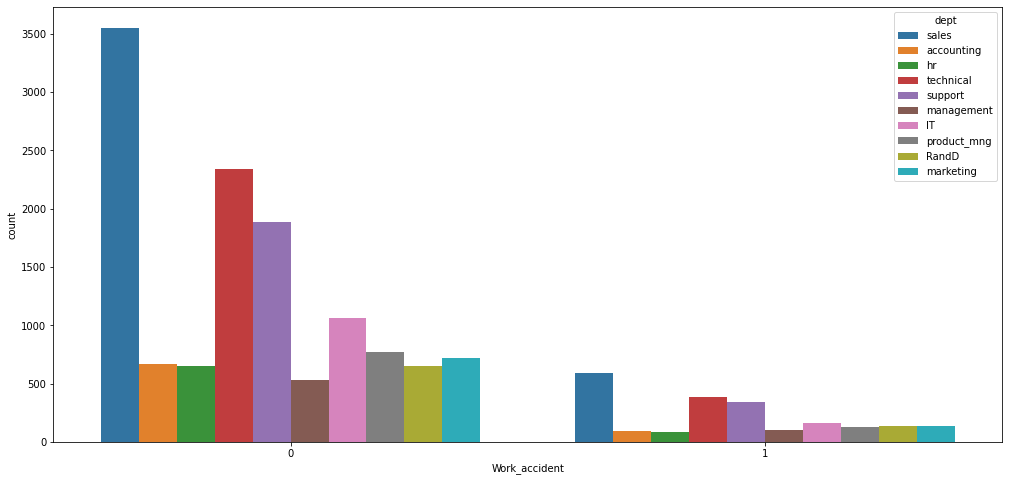

In [46]:
plt.figure(figsize=(17,8))
sns.countplot(V_data['Work_accident'],hue = V_data['dept'])

In [47]:
x=D_data.drop(['status'],axis =1 )
x.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
0,2001,0.58,0.74,4,215,3,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2002,0.82,0.67,2,202,3,0,0,0,0,0,0,0,0,0,0,1,0,0
2,2003,0.45,0.69,5,193,3,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2004,0.78,0.82,5,247,3,0,0,0,0,0,0,0,0,0,0,1,0,0
4,2005,0.49,0.60,3,214,2,0,0,0,0,0,0,0,0,0,0,1,0,0
